In [1]:
pip install riskfolio-lib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.6/307.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.8/238.8 kB 12.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.3.4
    Uninstalling cvxpy-1.3.4:
      Successfully uninstalled cvxpy-1.3.4


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from datetime import datetime
from datetime import date
import riskfolio as rp

import warnings
warnings.filterwarnings('ignore')

In [ ]:
tickers = ['GGAL', 'YPF', 'BBAR', 'BMA','CEPU','CRESY','EDN','IRS','LOMA','PAM','SUPV','TEO','TGS','TS','TX']
start = '2017-06-14'
end = '2024-06-14'
df = yf.download(tickers, start, end)

#Calculo los retornos
returns = df['Adj Close'].pct_change().dropna()

[*********************100%%**********************]  15 of 15 completed


#Variables

In [ ]:
method_mu ='hist'
method_cov = 'hist'
hist = True
model = 'Classic'
rm = 'MV'
obj = 'Sharpe'
rf = 0 #Tasa libre de riesgo
l = 0



#Optimizacion

In [ ]:
port = rp.Portfolio(returns = returns)
port.assets_stats(method_mu=method_mu, method_cov=method_cov )
w = port.optimization(model=model, rm=rm , obj=obj , rf=rf , l=l , hist=hist)

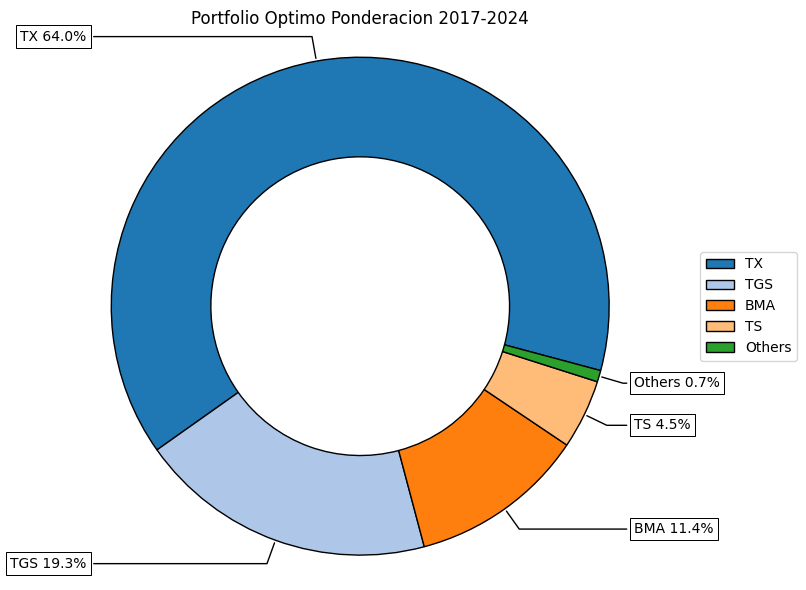

In [ ]:
ax = rp.plot_pie(w, title='Portfolio Optimo Ponderacion 2017-2024', cmap = 'tab20')
plt.show()

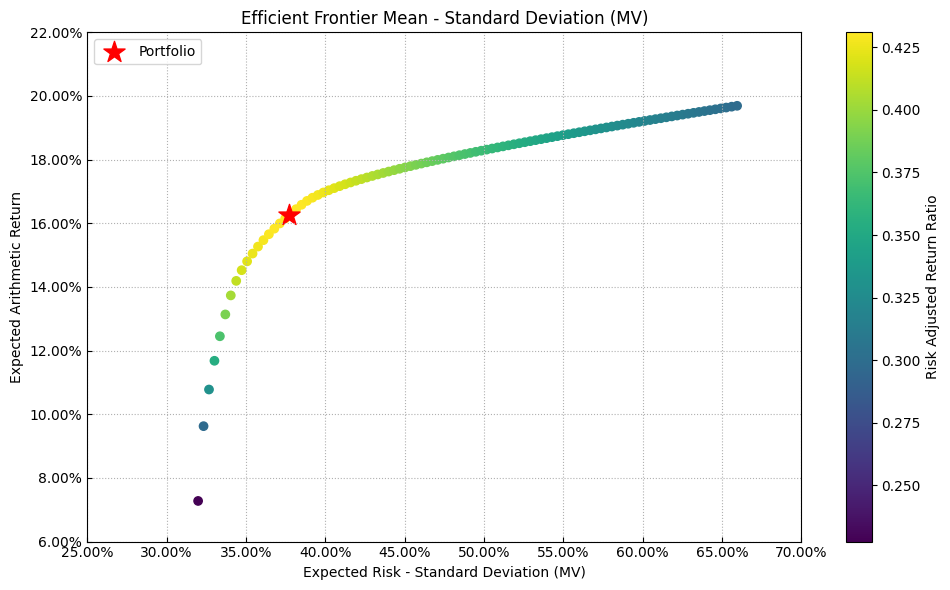

In [ ]:
frontier = port.efficient_frontier(model=model, rm=rm , points=100, rf=rf, hist=hist)

ax = rp.plot_frontier(w_frontier=frontier, mu=port.mu, cov=port.cov, returns = returns, rm=rm, rf=rf, cmap='viridis', w=w)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

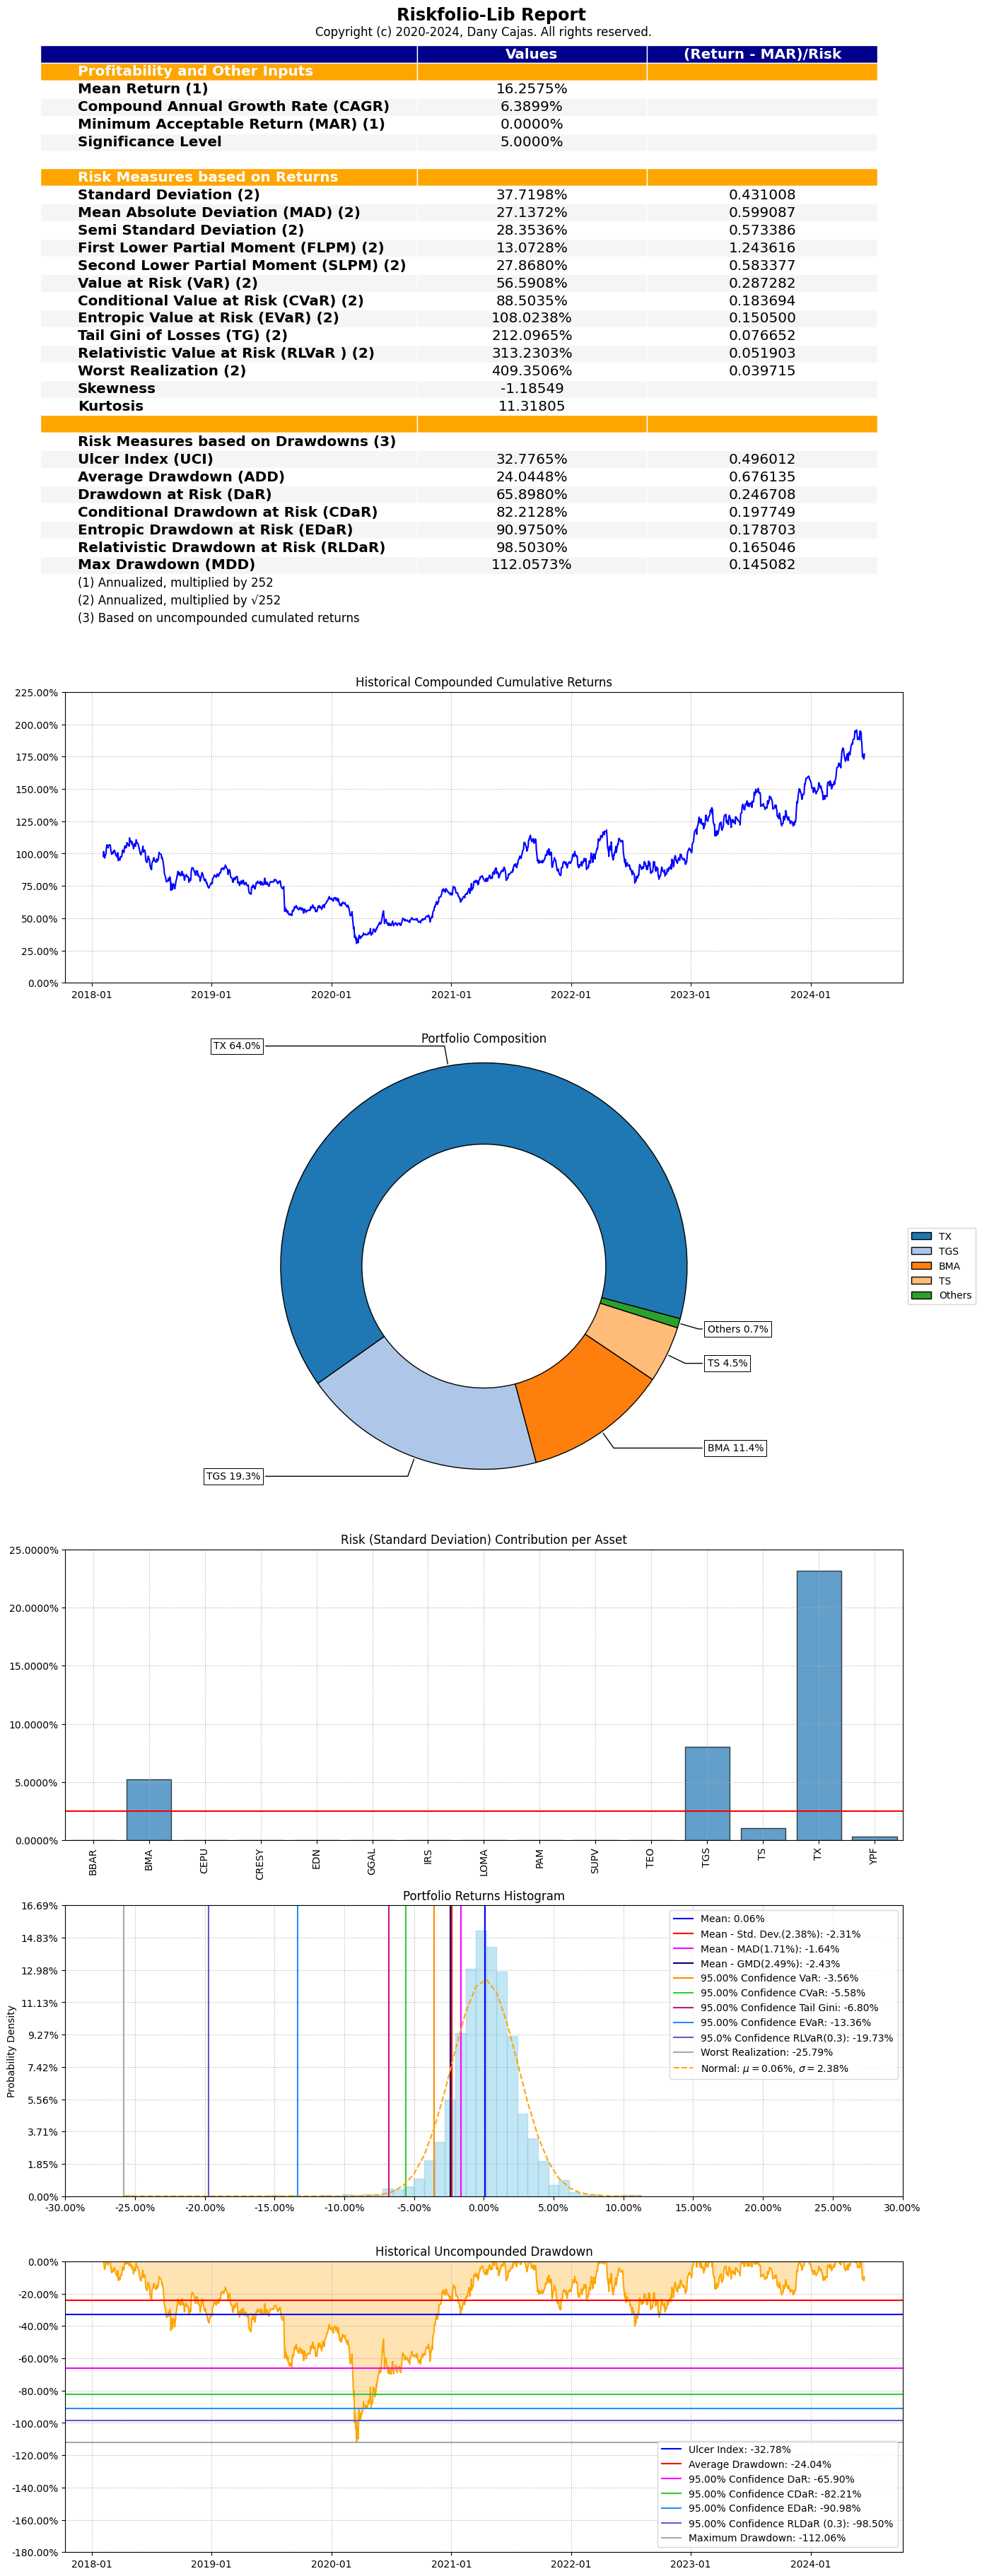

In [ ]:
ax = rp.jupyter_report(returns,
                       w,
                       rm='MV',
                       rf=0,
                       alpha=0.05,
                       height=6,
                       width=14,
                       others=0.05,
                       nrow=25)
plt.show